# Annexe

In [1]:
def descriptive_data(df, country=None):
    
    data = df.copy()
    if country:
        data = data[data.country == country]
        
    number_unique_ref = len(set(data.reference.values))
    number_unique_ref_collection = {}
    for collection in data.collection.unique():
        data_collection = data[data.collection == collection]
        number_unique_ref_collection[collection] = len(set(data_collection.reference.values))
        
        
    return number_unique_ref, number_unique_ref_collection

In [2]:
def analyze_country(data, country=None):
    """
    Analyze the country data.

    Parameters:
    data (pd.DataFrame): The data to analyze.
    country (str, optional): The country to filter by. Defaults to None.

    Returns:
    tuple: A tuple containing the overall statistics and the collection statistics.
    """
    # Filter the original data if a specific country is provided
    if country:
        data = data[data["country"] == country]
    
    # Identify the cheapest and most expensive product in the whole subset
    cheapest_product_data = data.nsmallest(1, 'price')
    most_expensive_product_data = data.nlargest(1, 'price')
    
    overall_stats = {
        "cheapest": {
            "collection": cheapest_product_data['collection'].values[0],
            "reference": cheapest_product_data['reference'].values[0],
            "price": cheapest_product_data['price'].values[0]
        },
        "most_expensive": {
            "collection": most_expensive_product_data['collection'].values[0],
            "reference": most_expensive_product_data['reference'].values[0],
            "price": most_expensive_product_data['price'].values[0]
        }
    }
    
    # Identify the cheapest and most expensive product per collection
    collection_stats = []
    unique_collections = data["collection"].unique()
    
    for collection in unique_collections:
        collection_data = data[data["collection"] == collection]
        
        cheapest_collection_data = collection_data.nsmallest(1, 'price')
        most_expensive_collection_data = collection_data.nlargest(1, 'price')
        
        collection_stats.append({
            "collection": collection,
            "cheapest": {
                "reference": cheapest_collection_data['reference'].values[0],
                "price": cheapest_collection_data['price'].values[0]
            },
            "most_expensive": {
                "reference": most_expensive_collection_data['reference'].values[0],
                "price": most_expensive_collection_data['price'].values[0]
            }
        })
    
    return overall_stats, collection_stats

In [3]:
def collection_visualization(data, country=None):
    """
    Visualize the collection data.

    Parameters:
    data (pd.DataFrame): The data to visualize.
    country (str): The country to filter by.

    Returns:
    None
    """
    # Filter the original data if a specific country is provided
    if country:
        data = data[data["country"] == country]
    
    # Choose a color palette
    palette = sns.color_palette("pastel")  # You can choose different palettes like "deep", "pastel", etc.

    # Create the count plot
    ax = sns.countplot(x="collection", data=data, palette=palette)

    # Add the count value on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', 
                    (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height() / 2.), 
                    ha='center', va='center', 
                    fontsize=10, color='black', 
                    xytext=(0, 5), textcoords='offset points')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Labels and title
    plt.xlabel("Collection")
    plt.ylabel("Watch Count")
    plt.title(f"Watch Count per Collection")
    if country:
        data = data[data["country"] == country]
        plt.title(f"Watch Count per Collection in {country}")

    # Show the plot
    plt.show()

In [4]:
def plot_collection_by_country(data):
    """
    Plot the number of items in each collection for each country on the same graph.
    
    Parameters:
        data (pd.DataFrame): Data containing at least 'collection' and 'country' columns.
    
    Returns:
        None
    """
    # Set the figure size
    plt.figure(figsize=(10, 6))
    
    # Create a count plot with 'collection' on the x-axis and bars grouped by 'country'
    ax = sns.countplot(x="collection", hue="country", data=data, palette="pastel")
    
    # Annotate each bar with its count
    for p in ax.patches:
        count = p.get_height()
        ax.annotate(f'{int(count)}',
                    (p.get_x() + p.get_width() / 2, p.get_y() + count / 2),
                    ha='center', va='center',
                    fontsize=10, color='black', 
                    xytext=(0, 5), textcoords='offset points')
    
    # Improve readability
    plt.xticks(rotation=45)
    plt.xlabel("Collection")
    plt.ylabel("Watch Count")
    plt.title("Watch Count per Collection by Country")
    plt.legend(title="Country")
    plt.tight_layout()
    plt.show()

# 1. Import librariries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Load & Read the Data

In [6]:
data = pd.read_csv(r"../orchestrator/data/silver/2025-03-07_01-56-07/PANERAI_DATA_2025.csv")
data.head()

,currency,collection,product_url,reference,price,year,image_url,country,brand,name,availability,currency_code,price_GBP,price_EUR,price_USD,price_JPY
0,$,Radiomir,https://www.panerai.com/us/en/collections/watc...,PAM01570,6000,2025,https://www.panerai.com/content/dam/rcq/pan/km...,USA,PANERAI,Radiomir Quaranta,Available,USD,4656.60,5557.20,6000.0,887670.60
1,$,Radiomir,https://www.panerai.com/us/en/collections/watc...,PAM01571,6000,2025,https://www.panerai.com/content/dam/rcq/pan/Ot...,USA,PANERAI,Radiomir Quaranta,Out of Stock,USD,4656.60,5557.20,6000.0,887670.60
2,$,Radiomir,https://www.panerai.com/us/en/collections/watc...,PAM01572,6000,2025,https://www.panerai.com/content/dam/rcq/pan/lz...,USA,PANERAI,Radiomir Quaranta,Available,USD,4656.60,5557.20,6000.0,887670.60
3,$,Radiomir,https://www.panerai.com/us/en/collections/watc...,PAM01573,6000,2025,https://www.panerai.com/content/dam/rcq/pan/iY...,USA,PANERAI,Radiomir Quaranta,Available,USD,4656.60,5557.20,6000.0,887670.60
4,$,Radiomir,https://www.panerai.com/us/en/collections/watc...,PAM01385,5400,2025,https://www.panerai.com/content/dam/rcq/pan/bc...,USA,PANERAI,Radiomir Officine,Out of Stock,USD,4190.94,5001.48,5400.0,798903.54


# 3. Exploratory Data Analysis (EDA)

### 3.1. Columns list

In [7]:
column_list = list(data.columns)

print("List of column name:\n")
for i in range(len(column_list)):
    print(f"\t{i+1}. {column_list[i]}")

List of column name:

	1. currency
	2. collection
	3. product_url
	4. reference
	5. price
	6. year
	7. image_url
	8. country
	9. brand
	10. name
	11. availability
	12. currency_code
	13. price_GBP
	14. price_EUR
	15. price_USD
	16. price_JPY


### 3.2. Data types discovery

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   currency       590 non-null    object 
 1   collection     590 non-null    object 
 2   product_url    590 non-null    object 
 3   reference      590 non-null    object 
 4   price          590 non-null    int64  
 5   year           590 non-null    int64  
 6   image_url      590 non-null    object 
 7   country        590 non-null    object 
 8   brand          590 non-null    object 
 9   name           590 non-null    object 
 10  availability   590 non-null    object 
 11  currency_code  590 non-null    object 
 12  price_GBP      590 non-null    float64
 13  price_EUR      590 non-null    float64
 14  price_USD      590 non-null    float64
 15  price_JPY      590 non-null    float64
dtypes: float64(4), int64(2), object(10)
memory usage: 73.9+ KB


--------------------------------------------------------------------------------------

**The dataset we used in the following use case contains**:

    1. 590 row of data
    
    2. 10 categoircal columns
    
    3. 6 numerical column
--------------------------------------------------------------------------------------

### 3.3. Check Missing Values

In [9]:
data.isna().sum()

currency         0
collection       0
product_url      0
reference        0
price            0
year             0
image_url        0
country          0
brand            0
name             0
availability     0
currency_code    0
price_GBP        0
price_EUR        0
price_USD        0
price_JPY        0
dtype: int64

--------------------------------------------------------------------------------------

**Now, the dataset is clean, no more missing values**

    ** -> We are ready to GO **

--------------------------------------------------------------------------------------

### 3.4. Check for duplicates bases on 'reference' and 'country'

In [10]:
# Check for duplicates based on 'reference', 'country', and 'collection'
duplicates = data.duplicated(subset=['reference', 'country']).sum()

# Display the duplicate rows
print(duplicates)

0


### 3.5. Descriptive statistics

In [11]:
stats = data.describe(include="object")
stats

,currency,collection,product_url,reference,image_url,country,brand,name,availability,currency_code
count,590,590,590,590,590,590,590,590,590,590
unique,4,4,590,149,149,4,1,174,2,4
top,$,Luminor,https://www.panerai.com/us/en/collections/watc...,PAM01570,https://www.panerai.com/content/dam/rcq/pan/km...,USA,PANERAI,Luminor Due,Available,USD
freq,149,215,1,4,4,149,590,41,420,149


# 4. Data and Business Analysis

### 4.1. Global dataset
- Number of unique products
- Number of products for each collection
- Products distribution

In [12]:
number_unique_ref, number_unique_ref_collection = descriptive_data(data)
    
print(f"\nThe number of unique references {number_unique_ref}")
print(f"\nThe number of unique references par collection")
for collection, number in number_unique_ref_collection.items():
    print(f"{collection} : {number}")


The number of unique references 149

The number of unique references par collection
Radiomir : 23
Luminor : 54
Submersible : 39
Luminor Due : 33


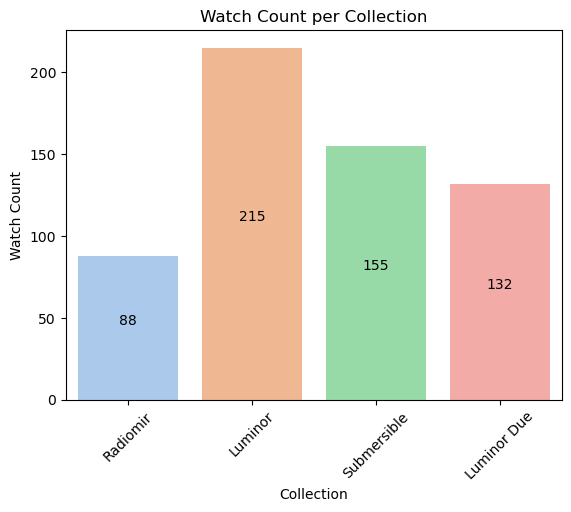

In [13]:
collection_visualization(data)

### 4.2. For each country
- Number of unique products
- Number of products for each collection
- The distribution of products
- For each collection using country currency
    - Cheapest and most expensive product
    - Cheapest and most expensive product per collection

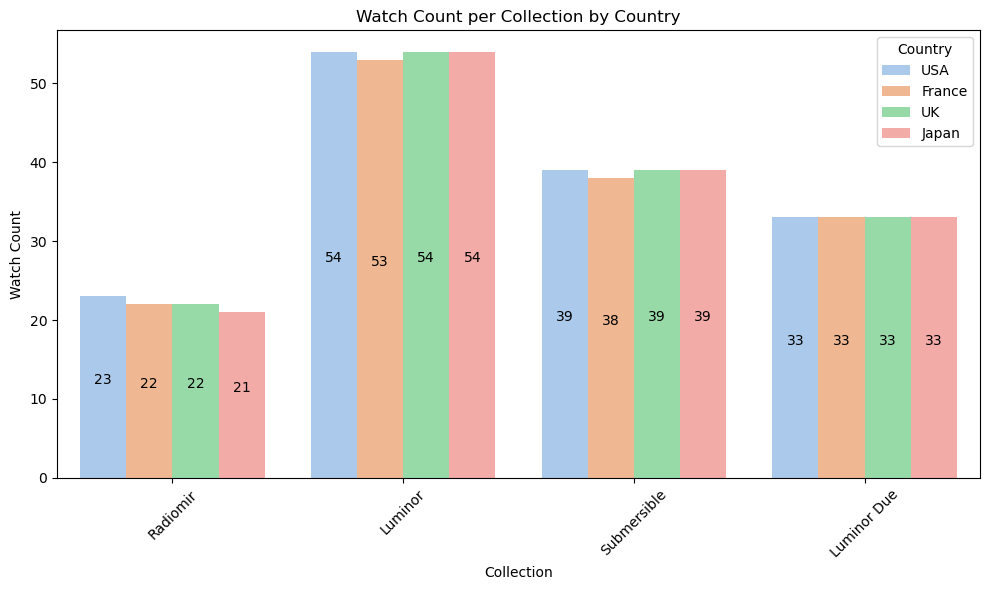

In [14]:
plot_collection_by_country(data)

### France

In [15]:
country = "France"

number_unique_ref, number_unique_ref_collection = descriptive_data(data, country = country)
overall_stats, collection_stats = analyze_country(data, country = country)

print(f"\n ** The number of unique references {number_unique_ref}")
print(f"\n ** The number of unique references par collection:\n")
for collection, number in number_unique_ref_collection.items():
    print(f"  - {collection} : {number}")
print("\n"+"-"*80+"") 
# Identify the cheapest and most expensive product in the whole subset
print(f"\n ** Cheapest and most expensive product in {country}:\n")
print(f"  Cheapest -> Collection: {overall_stats['cheapest']['collection']}, Reference: {overall_stats['cheapest']['reference']}, Price: {overall_stats['cheapest']['price']} {(data['currency'][data['country'] == country]).unique()[0]}")
print(f"  Most Expensive -> Collection: {overall_stats['most_expensive']['collection']}, Reference: {overall_stats['most_expensive']['reference']}, Price: {overall_stats['most_expensive']['price']} {(data['currency'][data['country'] == country]).unique()[0]}")
print("\n"+"-"*80+"")
# Identify the cheapest and most expensive product per collection
print(f"\n ** Cheapest and most expensive product in {country} per collection:\n")
for stat in collection_stats:
    print(f" - Collection: {stat['collection']}")
    print(f"    Cheapest -> Reference: {stat['cheapest']['reference']}, Price: {stat['cheapest']['price']} {(data['currency'][data['country'] == country]).unique()[0]}")
    print(f"    Most Expensive -> Reference: {stat['most_expensive']['reference']}, Price: {stat['most_expensive']['price']} {(data['currency'][data['country'] == country]).unique()[0]}")
    print("\n"+"*"*50+"\n")


 ** The number of unique references 146

 ** The number of unique references par collection:

  - Radiomir : 22
  - Luminor : 53
  - Submersible : 38
  - Luminor Due : 33

--------------------------------------------------------------------------------

 ** Cheapest and most expensive product in France:

  Cheapest -> Collection: Radiomir, Reference: PAM01383, Price: 5000 €
  Most Expensive -> Collection: Submersible, Reference: PAM01405, Price: 195000 €

--------------------------------------------------------------------------------

 ** Cheapest and most expensive product in France per collection:

 - Collection: Radiomir
    Cheapest -> Reference: PAM01383, Price: 5000 €
    Most Expensive -> Reference: PAM01284, Price: 170000 €

**************************************************

 - Collection: Luminor
    Cheapest -> Reference: PAM01623, Price: 5700 €
    Most Expensive -> Reference: PAM01060, Price: 189000 €

**************************************************

 - Collection: Su

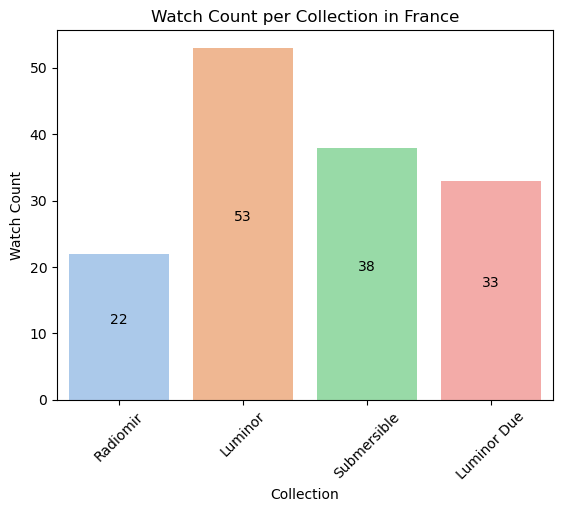

In [16]:
collection_visualization(data, country)

### UK

In [17]:
country = "UK"

number_unique_ref, number_unique_ref_collection = descriptive_data(data, country = country)
overall_stats, collection_stats = analyze_country(data, country = country)

print(f"\n ** The number of unique references {number_unique_ref}")
print(f"\n ** The number of unique references par collection:\n")
for collection, number in number_unique_ref_collection.items():
    print(f"  - {collection} : {number}")
print("\n"+"-"*80+"") 
# Identify the cheapest and most expensive product in the whole subset
print(f"\n ** Cheapest and most expensive product in {country}:\n")
print(f"  Cheapest -> Collection: {overall_stats['cheapest']['collection']}, Reference: {overall_stats['cheapest']['reference']}, Price: {overall_stats['cheapest']['price']} {(data['currency'][data['country'] == country]).unique()[0]}")
print(f"  Most Expensive -> Collection: {overall_stats['most_expensive']['collection']}, Reference: {overall_stats['most_expensive']['reference']}, Price: {overall_stats['most_expensive']['price']} {(data['currency'][data['country'] == country]).unique()[0]}")
print("\n"+"-"*80+"")
# Identify the cheapest and most expensive product per collection
print(f"\n ** Cheapest and most expensive product in {country} per collection:\n")
for stat in collection_stats:
    print(f" - Collection: {stat['collection']}")
    print(f"    Cheapest -> Reference: {stat['cheapest']['reference']}, Price: {stat['cheapest']['price']} {(data['currency'][data['country'] == country]).unique()[0]}")
    print(f"    Most Expensive -> Reference: {stat['most_expensive']['reference']}, Price: {stat['most_expensive']['price']} {(data['currency'][data['country'] == country]).unique()[0]}")
    print("\n"+"*"*50+"\n")


 ** The number of unique references 148

 ** The number of unique references par collection:

  - Radiomir : 22
  - Luminor : 54
  - Submersible : 39
  - Luminor Due : 33

--------------------------------------------------------------------------------

 ** Cheapest and most expensive product in UK:

  Cheapest -> Collection: Radiomir, Reference: PAM01383, Price: 4300 £
  Most Expensive -> Collection: Luminor, Reference: PAM00920, Price: 188200 £

--------------------------------------------------------------------------------

 ** Cheapest and most expensive product in UK per collection:

 - Collection: Radiomir
    Cheapest -> Reference: PAM01383, Price: 4300 £
    Most Expensive -> Reference: PAM01284, Price: 118500 £

**************************************************

 - Collection: Luminor
    Cheapest -> Reference: PAM01623, Price: 4900 £
    Most Expensive -> Reference: PAM00920, Price: 188200 £

**************************************************

 - Collection: Submersible
  

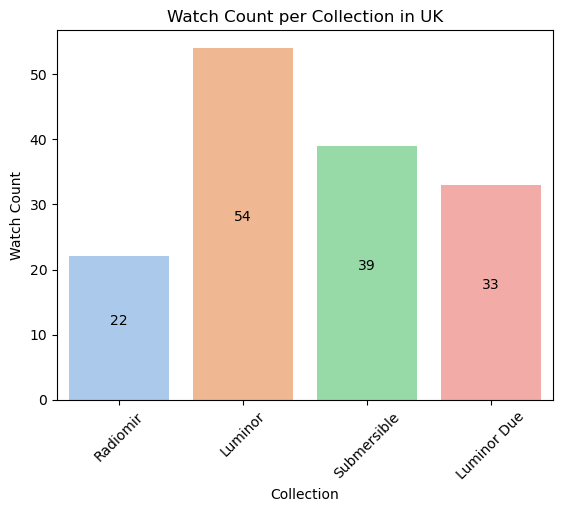

In [18]:
collection_visualization(data, country)

### USA

In [19]:
country = "USA"

number_unique_ref, number_unique_ref_collection = descriptive_data(data, country = country)
overall_stats, collection_stats = analyze_country(data, country = country)

print(f"\n ** The number of unique references {number_unique_ref}")
print(f"\n ** The number of unique references par collection:\n")
for collection, number in number_unique_ref_collection.items():
    print(f"  - {collection} : {number}")
print("\n"+"-"*80+"") 
# Identify the cheapest and most expensive product in the whole subset
print(f"\n ** Cheapest and most expensive product in {country}:\n")
print(f"  Cheapest -> Collection: {overall_stats['cheapest']['collection']}, Reference: {overall_stats['cheapest']['reference']}, Price: {overall_stats['cheapest']['price']} {(data['currency'][data['country'] == country]).unique()[0]}")
print(f"  Most Expensive -> Collection: {overall_stats['most_expensive']['collection']}, Reference: {overall_stats['most_expensive']['reference']}, Price: {overall_stats['most_expensive']['price']} {(data['currency'][data['country'] == country]).unique()[0]}")
print("\n"+"-"*80+"")
# Identify the cheapest and most expensive product per collection
print(f"\n ** Cheapest and most expensive product in {country} per collection:\n")
for stat in collection_stats:
    print(f" - Collection: {stat['collection']}")
    print(f"    Cheapest -> Reference: {stat['cheapest']['reference']}, Price: {stat['cheapest']['price']} {(data['currency'][data['country'] == country]).unique()[0]}")
    print(f"    Most Expensive -> Reference: {stat['most_expensive']['reference']}, Price: {stat['most_expensive']['price']} {(data['currency'][data['country'] == country]).unique()[0]}")
    print("\n"+"*"*50+"\n")


 ** The number of unique references 149

 ** The number of unique references par collection:

  - Radiomir : 23
  - Luminor : 54
  - Submersible : 39
  - Luminor Due : 33

--------------------------------------------------------------------------------

 ** Cheapest and most expensive product in USA:

  Cheapest -> Collection: Radiomir, Reference: PAM01383, Price: 4900 $
  Most Expensive -> Collection: Radiomir, Reference: PAM00600, Price: 398400 $

--------------------------------------------------------------------------------

 ** Cheapest and most expensive product in USA per collection:

 - Collection: Radiomir
    Cheapest -> Reference: PAM01383, Price: 4900 $
    Most Expensive -> Reference: PAM00600, Price: 398400 $

**************************************************

 - Collection: Luminor
    Cheapest -> Reference: PAM01623, Price: 5600 $
    Most Expensive -> Reference: PAM00920, Price: 233800 $

**************************************************

 - Collection: Submersible

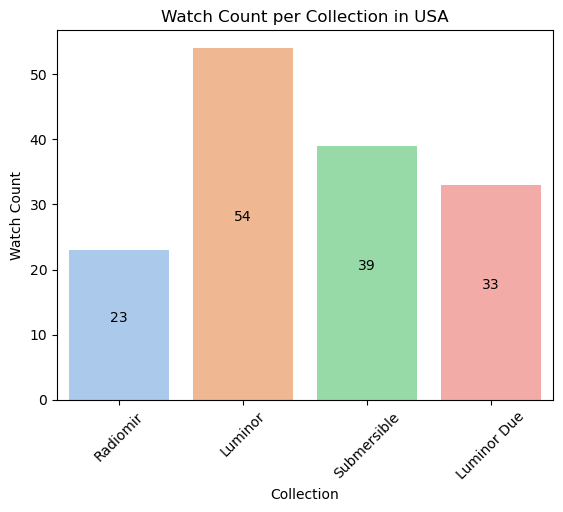

In [20]:
collection_visualization(data, country)

### Japan

In [21]:
country = "Japan"

number_unique_ref, number_unique_ref_collection = descriptive_data(data, country = country)
overall_stats, collection_stats = analyze_country(data, country = country)

print(f"\n ** The number of unique references {number_unique_ref}")
print(f"\n ** The number of unique references par collection:\n")
for collection, number in number_unique_ref_collection.items():
    print(f"  - {collection} : {number}")
print("\n"+"-"*80+"") 
# Identify the cheapest and most expensive product in the whole subset
print(f"\n ** Cheapest and most expensive product in {country}:\n")
print(f"  Cheapest -> Collection: {overall_stats['cheapest']['collection']}, Reference: {overall_stats['cheapest']['reference']}, Price: {overall_stats['cheapest']['price']} {(data['currency'][data['country'] == country]).unique()[0]}")
print(f"  Most Expensive -> Collection: {overall_stats['most_expensive']['collection']}, Reference: {overall_stats['most_expensive']['reference']}, Price: {overall_stats['most_expensive']['price']} {(data['currency'][data['country'] == country]).unique()[0]}")
print("\n"+"-"*80+"")
# Identify the cheapest and most expensive product per collection
print(f"\n ** Cheapest and most expensive product in {country} per collection:\n")
for stat in collection_stats:
    print(f" - Collection: {stat['collection']}")
    print(f"    Cheapest -> Reference: {stat['cheapest']['reference']}, Price: {stat['cheapest']['price']} {(data['currency'][data['country'] == country]).unique()[0]}")
    print(f"    Most Expensive -> Reference: {stat['most_expensive']['reference']}, Price: {stat['most_expensive']['price']} {(data['currency'][data['country'] == country]).unique()[0]}")
    print("\n"+"*"*50+"\n")


 ** The number of unique references 147

 ** The number of unique references par collection:

  - Radiomir : 21
  - Luminor : 54
  - Submersible : 39
  - Luminor Due : 33

--------------------------------------------------------------------------------

 ** Cheapest and most expensive product in Japan:

  Cheapest -> Collection: Radiomir, Reference: PAM01383, Price: 748000 ￥
  Most Expensive -> Collection: Luminor, Reference: PAM00920, Price: 39853000 ￥

--------------------------------------------------------------------------------

 ** Cheapest and most expensive product in Japan per collection:

 - Collection: Radiomir
    Cheapest -> Reference: PAM01383, Price: 748000 ￥
    Most Expensive -> Reference: PAM01284, Price: 25091000 ￥

**************************************************

 - Collection: Luminor
    Cheapest -> Reference: PAM01623, Price: 847000 ￥
    Most Expensive -> Reference: PAM00920, Price: 39853000 ￥

**************************************************

 - Collecti

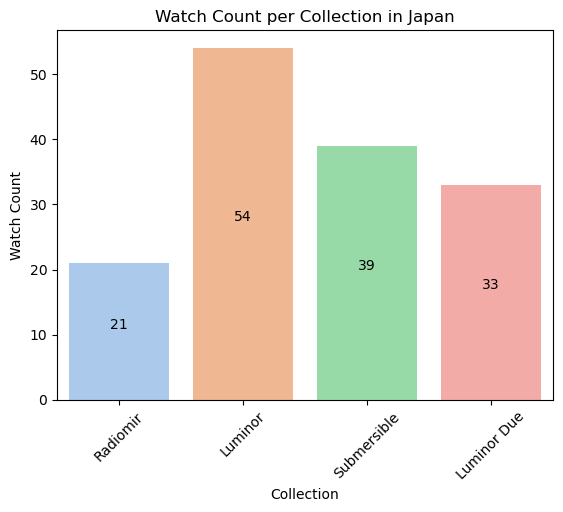

In [22]:
collection_visualization(data, country)

### 4.3. Select product that are available in 4 countries (under unified price currency “USD”)
1. For each product (reference) compare the price of the product with the median price of the product on the 4 country
   - **Price Difference** = Watch Price (in USD) – Median Watch Price across the Four Markets (in USD)
   - **Difference Rate (%)** = (Price Difference / Median Watch Price across the Four Markets (in USD)) × 10

2. Product with the lowest / highest Difference rate
3. Countries that encourage gray market activity and the number of opportunities created, and the margin lost to the gray market for each collection compared to the median price

In [23]:
data_subset = data[["collection", "reference", "price", "currency", "country", "year", "price_USD"]]
commun_data = data_subset.groupby('reference').filter(
    lambda group: set(data_subset.country.unique()).issubset(set(group['country']))
)

In [24]:
commun_data.head()

,collection,reference,price,currency,country,year,price_USD
0,Radiomir,PAM01570,6000,$,USA,2025,6000.0
1,Radiomir,PAM01571,6000,$,USA,2025,6000.0
2,Radiomir,PAM01572,6000,$,USA,2025,6000.0
3,Radiomir,PAM01573,6000,$,USA,2025,6000.0
4,Radiomir,PAM01385,5400,$,USA,2025,5400.0


In [25]:
number_unique_ref, number_unique_ref_collection = descriptive_data(commun_data)
    
print(f"\nThe number of unique references {number_unique_ref}")
print(f"\nThe number of unique references par collection")
for collection, number in number_unique_ref_collection.items():
    print(f"{collection} : {number}")


The number of unique references 145

The number of unique references par collection
Radiomir : 21
Luminor : 53
Submersible : 38
Luminor Due : 33


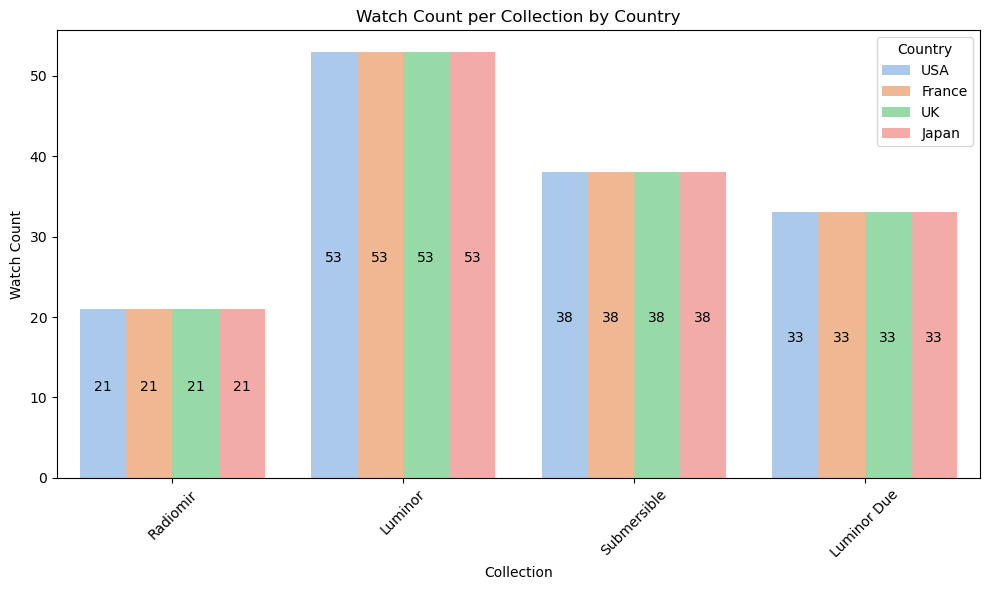

In [26]:
plot_collection_by_country(commun_data)

In [27]:
# Compute the median price_USD for each reference
median_by_reference = commun_data.groupby("reference")["price_USD"].median()

In [28]:
# Map the median price back to each row as a new column (optional)
commun_data["price_USD_median"] = commun_data["reference"].map(median_by_reference)

# Calculate the absolute difference between price_USD and the median
commun_data["Price Difference"] = commun_data["price_USD"] - commun_data["price_USD_median"]

# Calculate the rate (percentage difference) relative to the median
commun_data["Difference Rate (%)"] = (commun_data["Price Difference"] / commun_data["price_USD_median"]) * 100

# commun_data.drop("price_USD_median", axis=1, inplace=True)
commun_data.sort_values(["reference", "country"], inplace=True)
commun_data.reset_index(drop=True, inplace=True)

commun_data.head()

,collection,reference,price,currency,country,year,price_USD,price_USD_median,Price Difference,Difference Rate (%)
0,Luminor,PAM00422,11500,€,France,2025,12416.550,11970.3225,446.2275,3.727782
1,Luminor,PAM00422,1705000,￥,Japan,2025,11524.095,11970.3225,-446.2275,-3.727782
2,Luminor,PAM00422,9800,£,UK,2025,12627.300,11970.3225,656.9775,5.488386
3,Luminor,PAM00422,11300,$,USA,2025,11300.000,11970.3225,-670.3225,-5.599870
4,Luminor,PAM00670,24500,€,France,2025,26452.650,25493.9100,958.7400,3.760663


In [29]:
commun_data.to_csv(r"../orchestrator/data/gold/Products_available_4countries_with_comparative_metrics_2025.csv", index=False)

#### 4.3.1. Identify Products with Extreme Growth Rates
#### Positive direction
##### 1. Product with positive Growth rate

In [30]:
positive_Difference_Rate = commun_data[commun_data["Difference Rate (%)"] >= 0].reset_index(drop=True)
positive_Difference_Rate

,collection,reference,price,currency,country,year,price_USD,price_USD_median,Price Difference,Difference Rate (%)
0,Luminor,PAM00422,11500,€,France,2025,12416.55,11970.3225,446.2275,3.727782
1,Luminor,PAM00422,9800,£,UK,2025,12627.30,11970.3225,656.9775,5.488386
2,Luminor,PAM00670,24500,€,France,2025,26452.65,25493.9100,958.7400,3.760663
3,Luminor,PAM00670,20700,£,UK,2025,26671.95,25493.9100,1178.0400,4.620868
4,Luminor,PAM00715,72000,€,France,2025,77738.40,68251.9170,9486.4830,13.899218
...,...,...,...,...,...,...,...,...,...,...
285,Submersible,PAM02692,12800,£,UK,2025,16492.80,15735.3330,757.4670,4.813797
286,Submersible,PAM02973,9700,€,France,2025,10473.09,10106.4045,366.6855,3.628249
287,Submersible,PAM02973,8200,£,UK,2025,10565.70,10106.4045,459.2955,4.544598
288,Submersible,PAM02979,20600,€,France,2025,22241.82,21418.2465,823.5735,3.845196


##### 2. Product with the highest Growth rate

In [31]:
highest_Difference_Rate = commun_data.nlargest(1, 'Difference Rate (%)').reset_index(drop=True)

print("\nProduct with the Highest Difference Rate:")
highest_Difference_Rate


Product with the Highest Difference Rate:


,collection,reference,price,currency,country,year,price_USD,price_USD_median,Price Difference,Difference Rate (%)
0,Submersible,PAM01405,195000,€,France,2025,210541.5,184802.067,25739.433,13.928109


In [32]:
highest_Difference_Rate.to_csv(r"../orchestrator/data/gold/Product_with_Highest_Difference_Rate_2025.csv", index=False)

#### Negative direction
##### 1. Product with negative Growth rate

In [33]:
negative_Difference_Rate = commun_data[commun_data["Difference Rate (%)"] < 0].reset_index(drop=True)
negative_Difference_Rate

,collection,reference,price,currency,country,year,price_USD,price_USD_median,Price Difference,Difference Rate (%)
0,Luminor,PAM00422,1705000,￥,Japan,2025,11524.095,11970.3225,-446.2275,-3.727782
1,Luminor,PAM00422,11300,$,USA,2025,11300.000,11970.3225,-670.3225,-5.599870
2,Luminor,PAM00670,3630000,￥,Japan,2025,24535.170,25493.9100,-958.7400,-3.760663
3,Luminor,PAM00670,24000,$,USA,2025,24000.000,25493.9100,-1493.9100,-5.859870
4,Luminor,PAM00715,50200,£,UK,2025,64682.700,68251.9170,-3569.2170,-5.229475
...,...,...,...,...,...,...,...,...,...,...
285,Submersible,PAM02692,14800,$,USA,2025,14800.000,15735.3330,-935.3330,-5.944158
286,Submersible,PAM02973,1441000,￥,Japan,2025,9739.719,10106.4045,-366.6855,-3.628249
287,Submersible,PAM02973,9500,$,USA,2025,9500.000,10106.4045,-606.4045,-6.000200
288,Submersible,PAM02979,3047000,￥,Japan,2025,20594.673,21418.2465,-823.5735,-3.845196


##### 2. Product with the lowest Growth rate

In [34]:
lowest_Difference_Rate = commun_data.nsmallest(1, 'Difference Rate (%)').reset_index(drop=True)

print("\nProduct with the Lowest Difference Rate:")
lowest_Difference_Rate


Product with the Lowest Difference Rate:


,collection,reference,price,currency,country,year,price_USD,price_USD_median,Price Difference,Difference Rate (%)
0,Radiomir,PAM01364,51100,$,USA,2025,51100.0,55985.304,-4885.304,-8.726047


In [35]:
lowest_Difference_Rate.to_csv(r"../orchestrator/data/gold/Product_with_Lowest_Difference_Rate_2025.csv", index=False)

### 4.4. Gray market activity

In [36]:
country_negative_Difference_Rate = negative_Difference_Rate["country"].value_counts()

print("Countries that encourage gray market activity and the number of opportunities created")
for country, value in zip(country_negative_Difference_Rate.index, country_negative_Difference_Rate.values):
    print(f"{country} : {value}")

Countries that encourage gray market activity and the number of opportunities created
USA : 145
Japan : 131
UK : 14


In [37]:
gray_market_margin_collection = negative_Difference_Rate.groupby(["country", "collection"])["Price Difference"].sum()*(-1)
print("The margin lost to the gray market for each collection, relative to the median price")
gray_market_margin_collection

The margin lost to the gray market for each collection, relative to the median price


country  collection 
Japan    Luminor        22141.0815
         Luminor Due    19747.1730
         Radiomir        5846.6040
         Submersible    19475.8830
UK       Luminor        18086.9445
         Radiomir       16237.7490
         Submersible    27417.0330
USA      Luminor        64357.7930
         Luminor Due    29640.4270
         Radiomir       36077.3550
         Submersible    74971.1600
Name: Price Difference, dtype: float64

In [38]:
gray_market_margin_collection.to_csv(r"../orchestrator/data/gold/Margin_lost_to_the_gray_market_2025.csv", index=False)